In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [22]:
# Load the data into a pandas dataframe

df = pd.read_csv('waterQuality1.csv')
df.head()

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  

[5 rows x 21 columns]

In [23]:
# finding the number of columns and rows in the dataset
print(df.shape)

(7999, 21)


In [24]:
# Datatypes of all the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [25]:
# Convert both columns to numeric data type 
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce') ## coerce the ? to missing
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce') ## coerce the ? to missing
missing_any = df.isnull().any()
print("\nColumns with any missing value:")
print(missing_any[missing_any])


Columns with any missing value:
ammonia    True
is_safe    True
dtype: bool


In [26]:
# print the rows with missing values
print(df[df.isna().any(axis=1)])

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
7551       0.03      NaN     0.08    0.79     0.07        0.08      0.05   
7568       0.06      NaN     0.07    1.72     0.08        0.32      0.01   
7890       0.01      NaN     0.08    0.49     0.00        0.07      0.09   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
7551    0.58      0.34      0.00  ...  0.183      4.37      1.43    0.007   
7568    1.11      0.61      0.00  ...  0.178     12.10      2.03    0.008   
7890    0.06      0.72      0.57  ...  0.088      9.57      1.45    0.009   

      perchlorate  radium  selenium  silver  uranium  is_safe  
7551         0.62    2.54      0.07    0.05     0.05      NaN  
7568         1.37    2.05      0.06    0.10     0.07      NaN  
7890         7.67    7.70      0.03    0.05     0.02      NaN  

[3 rows x 21 columns]


In [27]:
# Drop the rows containing any missing values
df = df.dropna()
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, uranium, is_safe]
Index: []

[0 rows x 21 columns]


In [28]:
# Calculate the number of columns and rows in the dataset after dropping the missing values
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7996
Number of columns: 21


In [29]:
# statistic metrics for continuous variables without scientific notation
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]

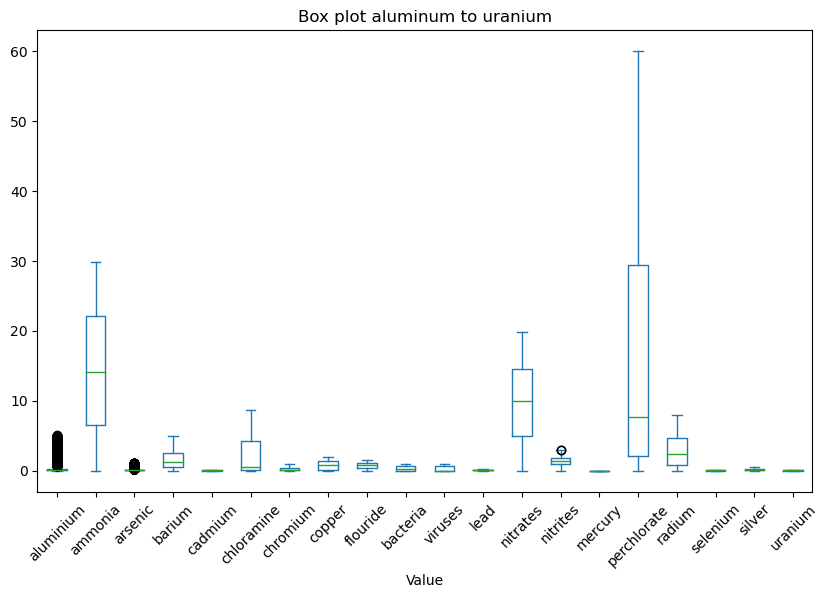

In [30]:
# Create a box plot to identify outliers in the dataset
subset=df.loc[:, 'aluminium':'uranium']
subset.plot(kind="box", vert=True, rot=45, figsize=(10, 6))
plt.title("Box plot aluminum to uranium", fontsize=12)
plt.xlabel("Value")
plt.show()

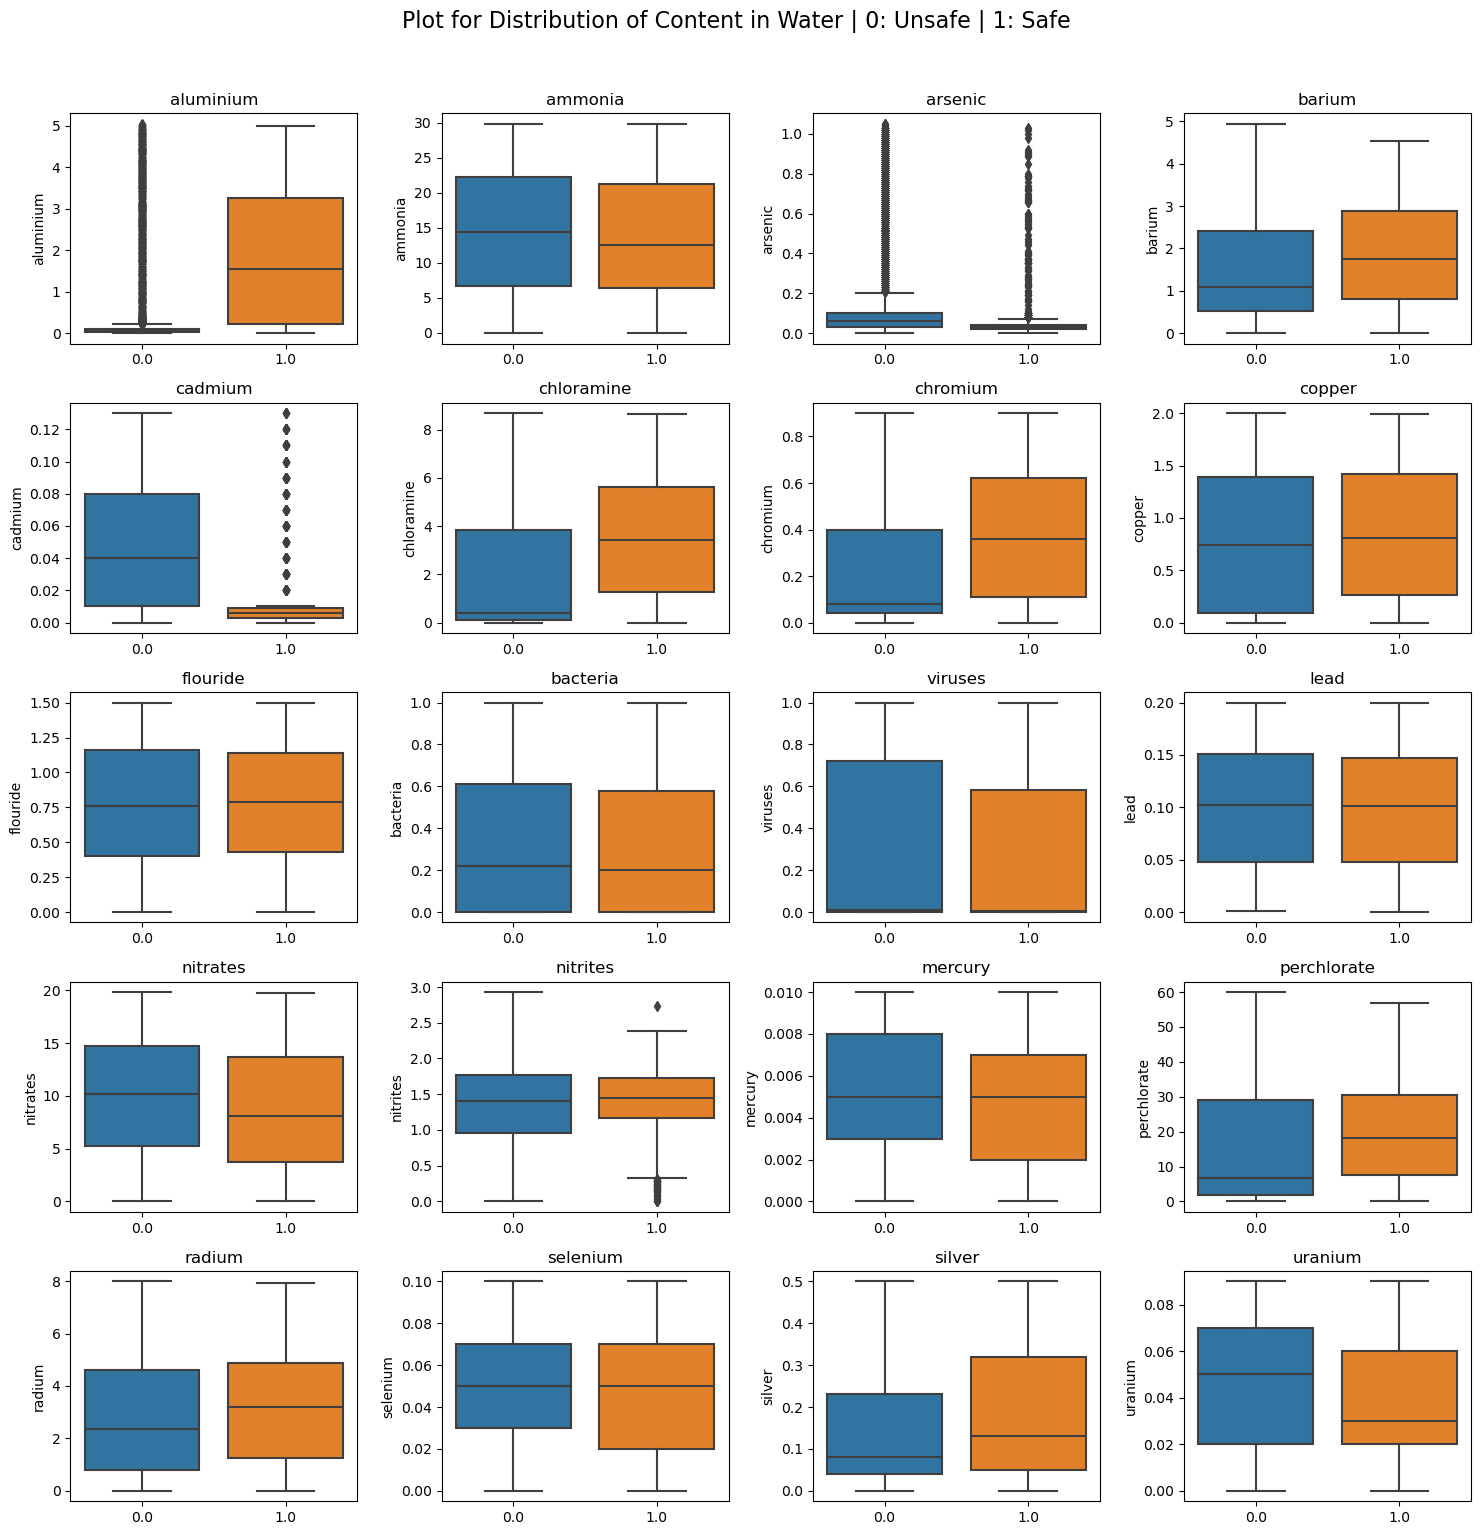

In [31]:
columns_to_plot = df.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=df, x='is_safe', y=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')
    axes[row_index, col_index].set_ylabel(col)  # Set ylabel for each subplot

plt.suptitle("Plot for Distribution of Content in Water | 0: Unsafe | 1: Safe", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

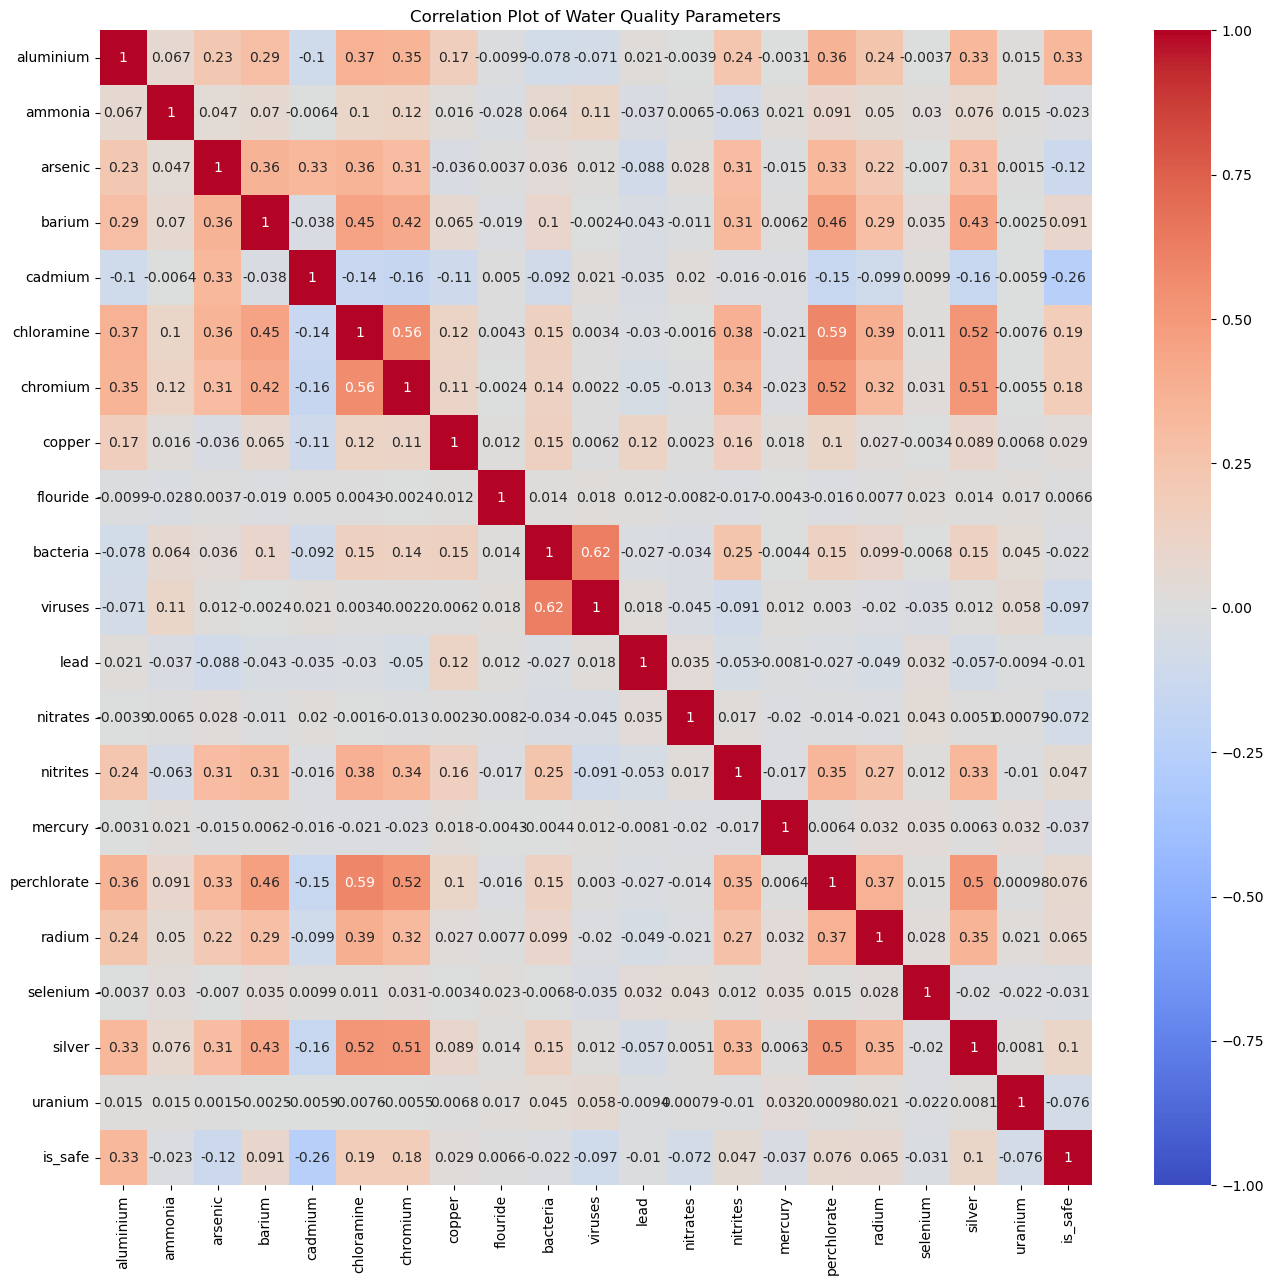

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Plot of Water Quality Parameters")
plt.show()

C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local\Temp\ipykernel_20856\3144035631.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\5584\AppData\Local

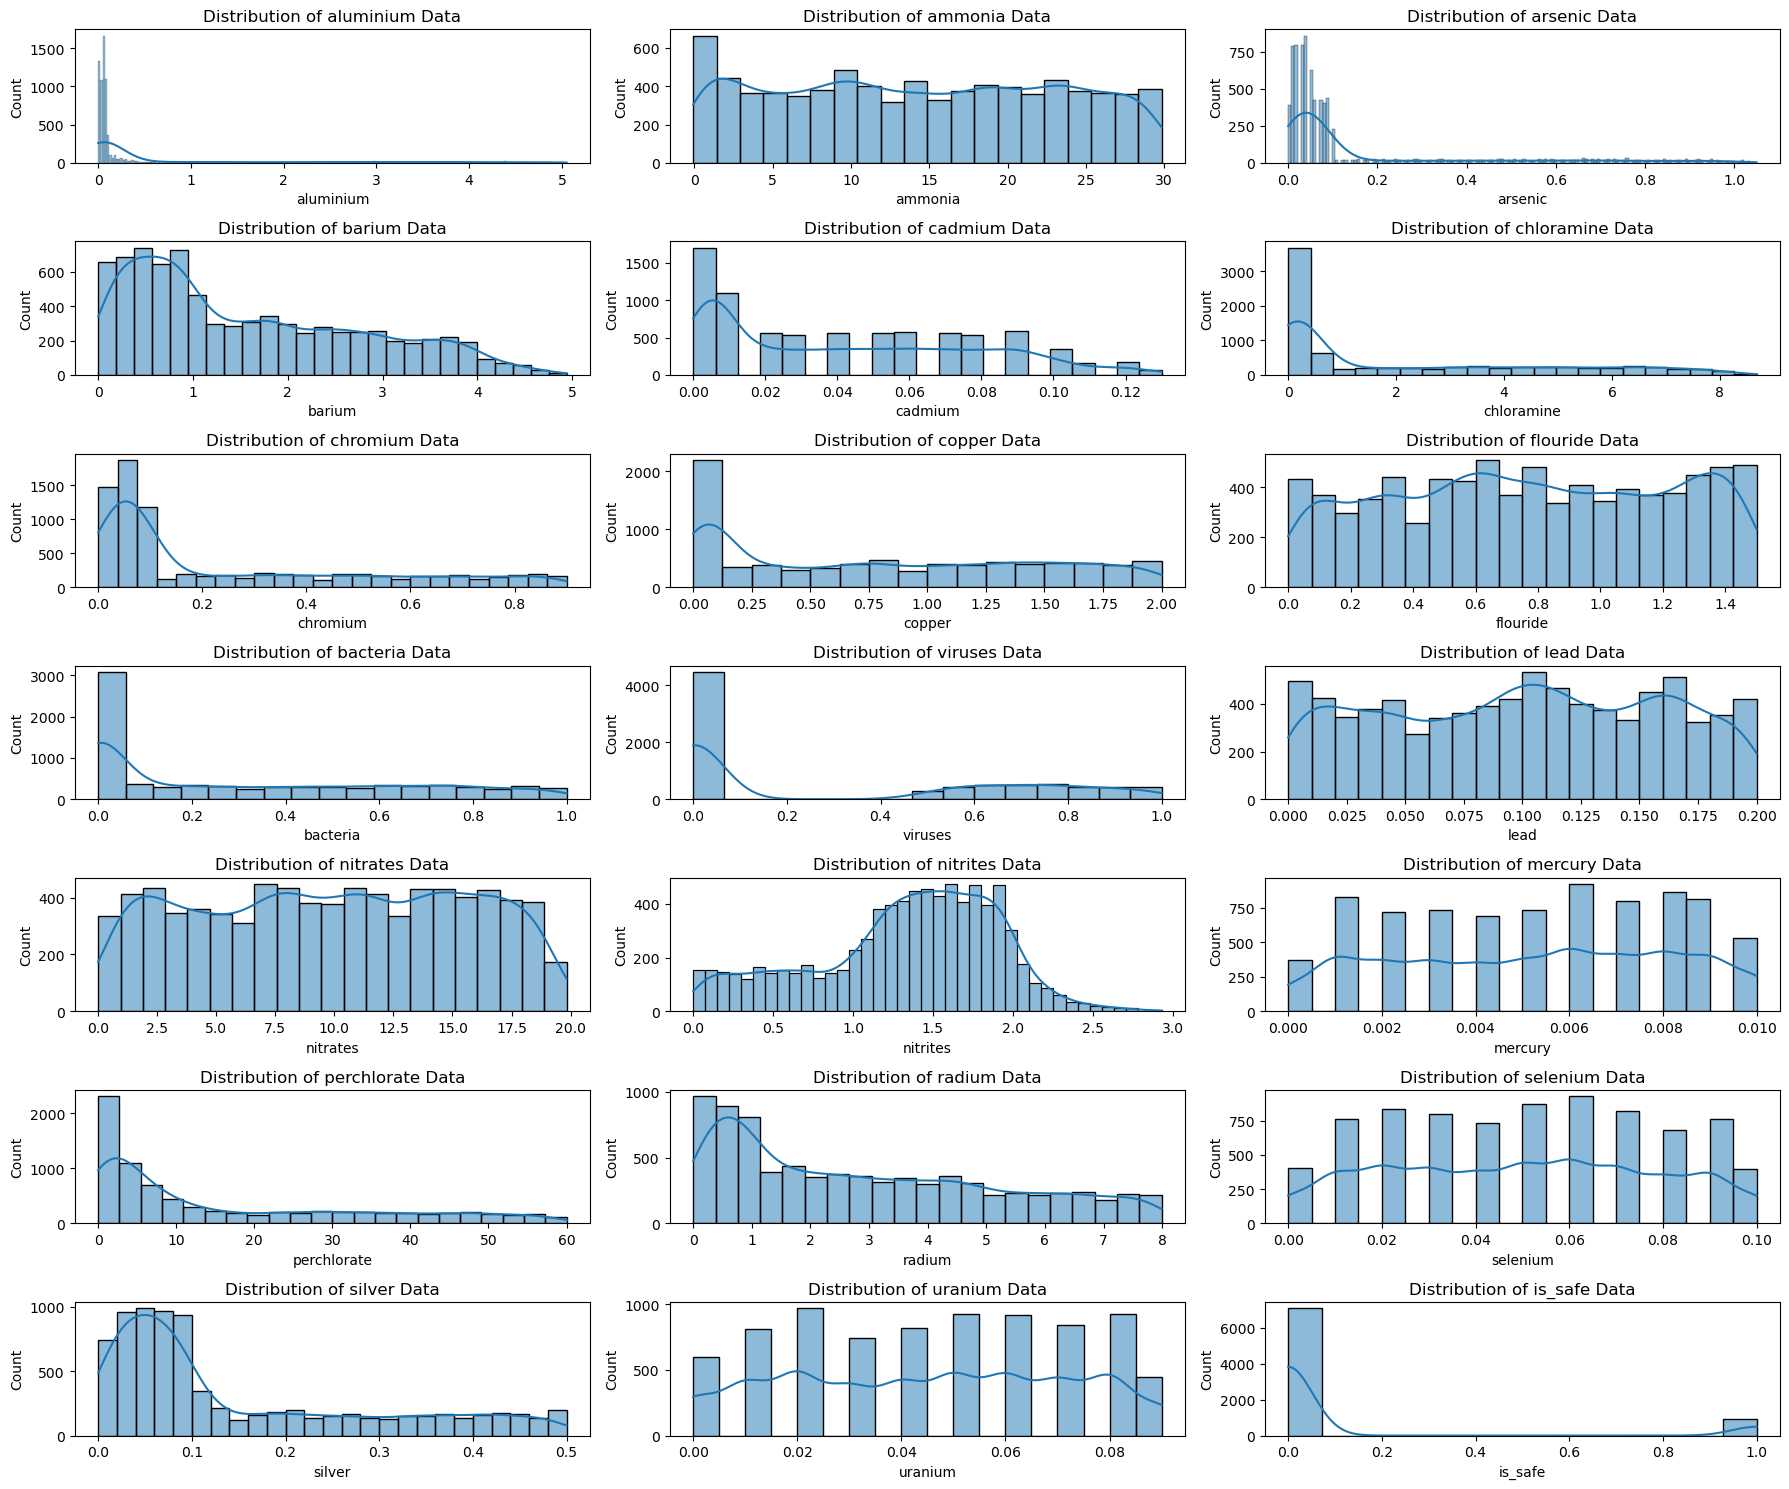

In [33]:
plt.figure(figsize=(18, 15))
num_cols = len(df.columns)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()

plt.show()
# print(df.columns)

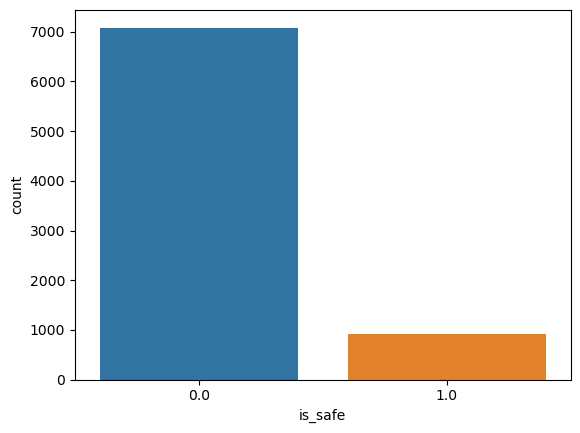

In [34]:
# Analyse the distribution of values in target variable through a count plot
sns.countplot(data = df, x = 'is_safe')
plt.show()

In [35]:
# Use RandomOverSampler to balance the distribution of values in the target variable
attr = df.drop(columns=['is_safe'])
target = df['is_safe']
ros = RandomOverSampler(sampling_strategy='minority')
attr, target = ros.fit_resample(attr, target) #y_train as balanced target variable
print(attr.shape[0] - df.shape[0], 'new random picked points')

6172 new random picked points


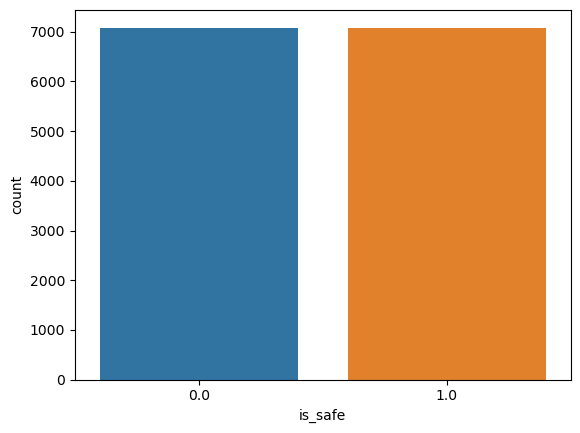

In [36]:
sns.countplot(data = df, x = target)
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0   0.326733  0.306150  0.038095  0.576923  0.053846    0.040323  0.922222   
1   0.459406  0.709893  0.009524  0.670040  0.015385    0.608295  0.755556   
2   0.200000  0.471257  0.038095  0.117409  0.061538    0.488479  0.588889   
3   0.269307  0.381350  0.038095  0.599190  0.007692    0.832949  0.033333   
4   0.182178  0.815842  0.028571  0.040486  0.046154    0.307604  0.766667   

   copper  flouride  bacteria  viruses   lead  nitrates  nitrites  mercury  \
0   0.085  0.033333      0.20    0.000  0.270  0.810893  0.385666      0.7   
1   0.330  0.600000      0.65    0.650  0.500  0.101362  0.658703      0.3   
2   0.010  0.660000      0.05    0.003  0.390  0.714070  0.378840      0.6   
3   0.830  0.720000      0.71    0.710  0.080  0.071104  0.440273      0.4   
4   0.285  0.406667      0.13    0.001  0.585  0.339889  0.378840      0.3   

   perchlorate    radium  selenium  silver   uranium  
0     0.629062  0.848561       0.8    0.68  0.222222  
1     0.537577  0.401752       0.8    0.54  0.555556  
2     0.837860  0.884856       0.7    0.88  0.111111  
3     0.151975  0.215269       0.2    0.90  0.555556  
4     0.281620  0.301627       0.2    0.12  0.222222

In [38]:
# splitting the data into training data and testing data in the ratio 70:30
attr_train, attr_test, target_train, target_test  = train_test_split(attr, target,test_size = 0.3, random_state = 4, shuffle = True)

In [39]:
# KNN Model

# Initialise list for storing the accuracy of all the algorithms
accuracy_values = []
model_names = []
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Initialise the model
knn = KNeighborsClassifier(n_neighbors = 3)
# Fitting the model
knn.fit(attr_train.values, target_train.values)
# Making predictions
target_pred=knn.predict(attr_test.values)
accuracy = accuracy_score(target_test,target_pred)
accuracy_values.append(accuracy)
model_names.append('KNN')
# Calculate accuracy
print(f'Accuracy of model: {accuracy}%')
# Confusion Matrix
print()
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
# Classification Report
print()
print('Classification report:')
print(classification_report(target_test,target_pred))

Accuracy of model: 0.8955539872971066%

Confusion matrix:
[[1715  418]
 [  26 2092]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      2133
         1.0       0.83      0.99      0.90      2118

    accuracy                           0.90      4251
   macro avg       0.91      0.90      0.89      4251
weighted avg       0.91      0.90      0.89      4251



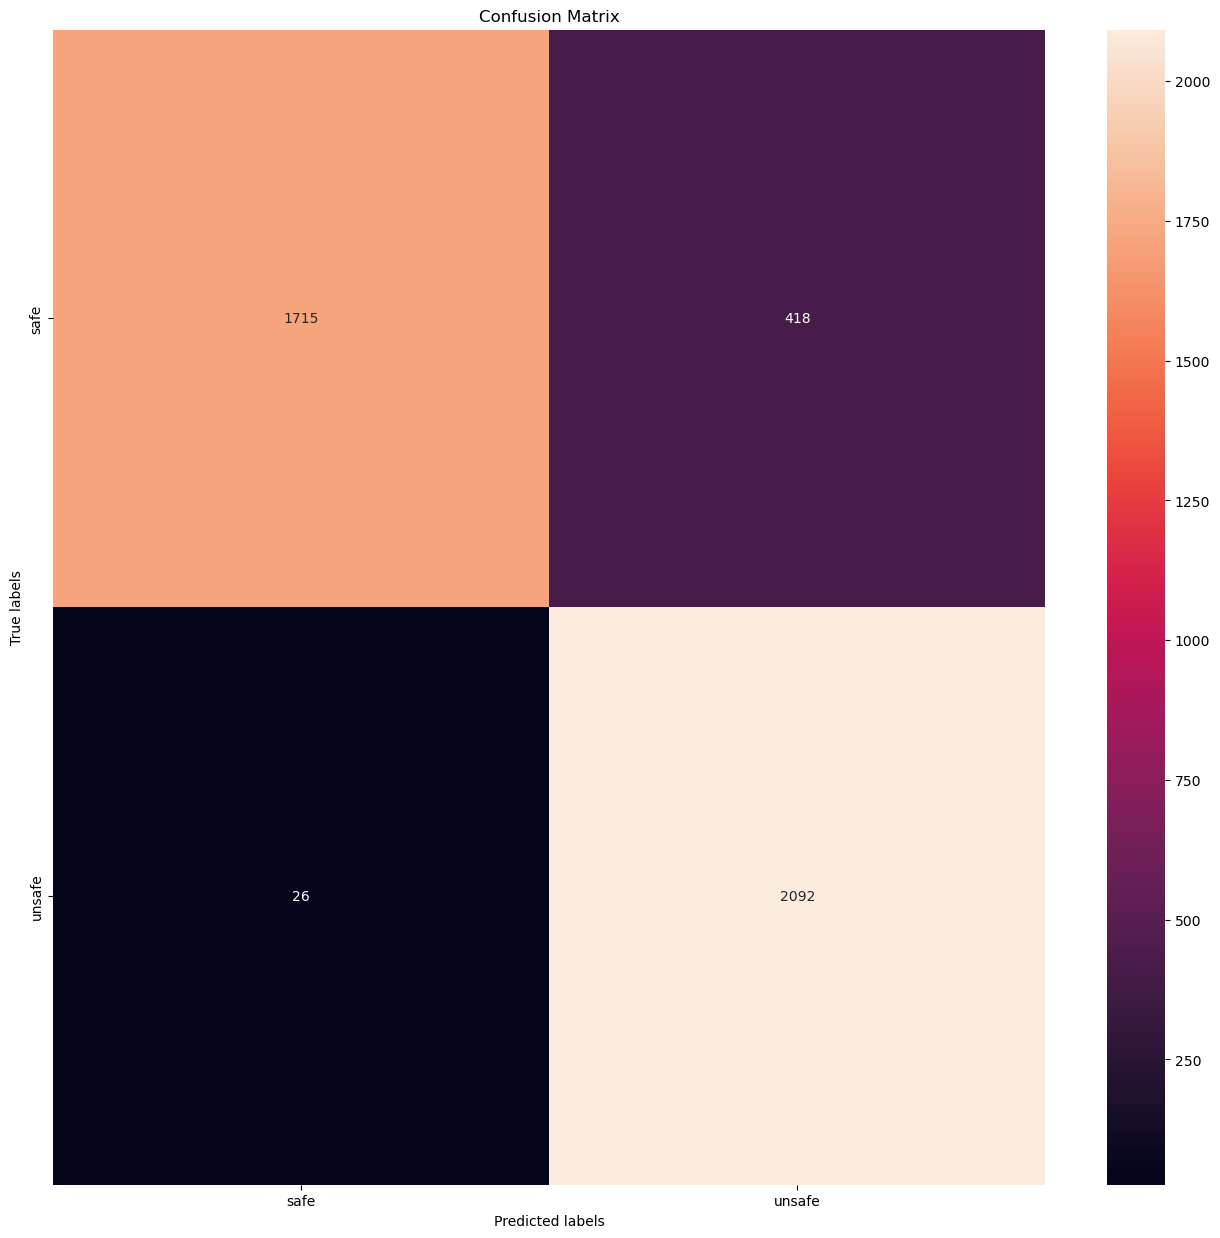

In [40]:
plt.figure(figsize=(16, 15))
sns.heatmap(cm, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
plt.xlabel('Predicted labels');
plt.ylabel('True labels'); 
plt.title('Confusion Matrix'); 
plt.xticks(ticks=[0.5, 1.5], labels=['safe', 'unsafe'])
plt.yticks(ticks=[0.5, 1.5], labels=['safe', 'unsafe'])
plt.show()

In [41]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
#Initialise the model
gnb = GaussianNB()
# Fitting the model
gnb.fit(attr_train, target_train)
# Making predictions
target_pred = gnb.predict(attr_test)
# Calculate accuracy
accuracy = accuracy_score(target_test, target_pred)
accuracy_values.append(accuracy)
model_names.append('Naive Bayes')
print("Accuracy:", accuracy)
# Confusion Matrix
print()
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
# Classification Report
print()
print('Classification report:')
print(classification_report(target_test,target_pred))

Accuracy: 0.7659374264878852

Confusion matrix:
[[1632  501]
 [ 494 1624]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      2133
         1.0       0.76      0.77      0.77      2118

    accuracy                           0.77      4251
   macro avg       0.77      0.77      0.77      4251
weighted avg       0.77      0.77      0.77      4251



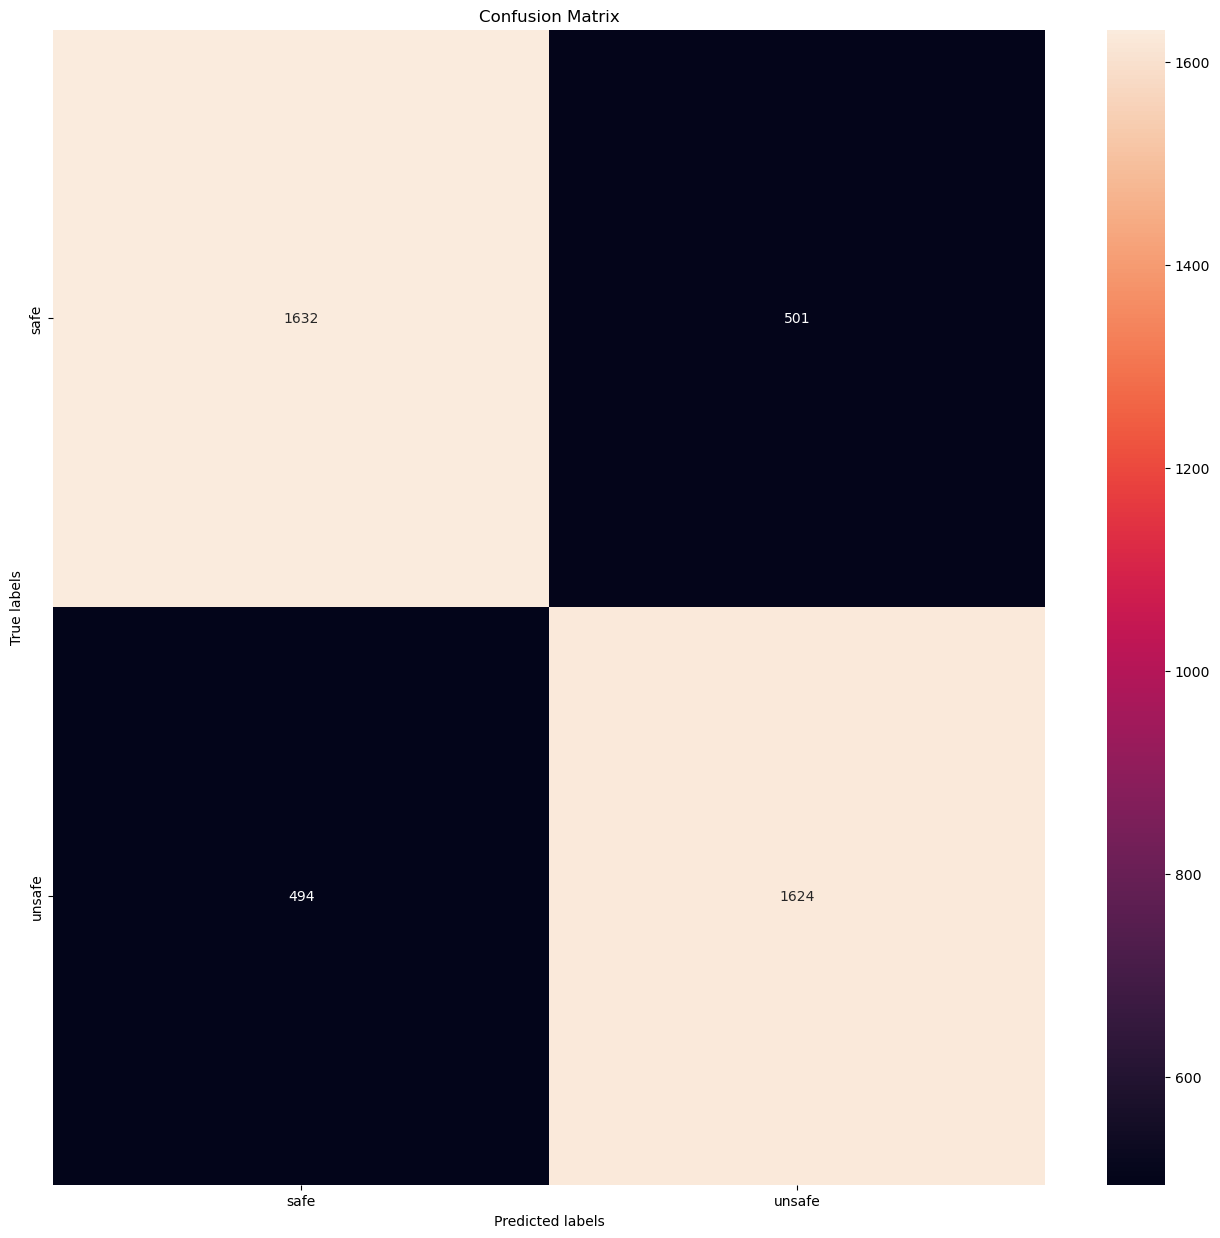

In [42]:
plt.figure(figsize=(16, 15))
sns.heatmap(cm, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
plt.xlabel('Predicted labels');
plt.ylabel('True labels'); 
plt.title('Confusion Matrix'); 
plt.xticks(ticks=[0.5, 1.5], labels=['safe', 'unsafe'])
plt.yticks(ticks=[0.5, 1.5], labels=['safe', 'unsafe'])
plt.show()

In [43]:
# Classification & Regression Tree Model(CART Model)

from sklearn.tree import DecisionTreeClassifier
# Initialise CART model
model = DecisionTreeClassifier()
# Fit the model
model.fit(attr_train,target_train)

DecisionTreeClassifier()

In [44]:
# predict result on test data
target_pred = model.predict(attr_test)

In [45]:
# calculate accuracy of result
accuracy = accuracy_score(target_test, target_pred)
accuracy_values.append(accuracy)
model_names.append('CART')
print("Accuracy:", accuracy)
# Confusion Matrix
print()
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
# Classification Report
print()
print('Classification report:')
print(classification_report(target_test,target_pred))

Accuracy: 0.9828275699835333

Confusion matrix:
[[2065   68]
 [   5 2113]]

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2133
         1.0       0.97      1.00      0.98      2118

    accuracy                           0.98      4251
   macro avg       0.98      0.98      0.98      4251
weighted avg       0.98      0.98      0.98      4251



In [46]:
# Plotting the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100,100))
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns.tolist());

In [47]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
# Fit the model
rf_classifier.fit(attr_train, target_train)

RandomForestClassifier(random_state=42)

In [49]:
# Making predictions
target_pred = rf_classifier.predict(attr_test)

In [50]:
# Calculate accuracy
accuracy = accuracy_score(target_test, target_pred)
accuracy_values.append(accuracy)
model_names.append('Random Forest')
print("Accuracy:", accuracy)
print()
# Confusion Matrix
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
print()
# Classification Report
print('Classification report:')
print(classification_report(target_test, target_pred))

Accuracy: 0.9868266290284639

Confusion matrix:
[[2077   56]
 [   0 2118]]

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2133
         1.0       0.97      1.00      0.99      2118

    accuracy                           0.99      4251
   macro avg       0.99      0.99      0.99      4251
weighted avg       0.99      0.99      0.99      4251



In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

In [52]:
# Fit the model
logreg_classifier.fit(attr_train, target_train)

LogisticRegression(random_state=42)

In [53]:
# Making predictions
target_pred = logreg_classifier.predict(attr_test)

In [54]:
# Calculate accuracy
accuracy = accuracy_score(target_test, target_pred)
accuracy_values.append(accuracy)
model_names.append('Logistic Regression')
print("Accuracy:", accuracy)
print()
# Confusion Matrix
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
print()
# Classification Report
print('Classification report:')
print(classification_report(target_test, target_pred))

Accuracy: 0.7899317807574688

Confusion matrix:
[[1722  411]
 [ 482 1636]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79      2133
         1.0       0.80      0.77      0.79      2118

    accuracy                           0.79      4251
   macro avg       0.79      0.79      0.79      4251
weighted avg       0.79      0.79      0.79      4251



In [55]:
# Support Vector

from sklearn.svm import SVC
# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

In [56]:
# Fit the model
svm_classifier.fit(attr_train, target_train)

SVC(random_state=42)

In [57]:
# Making predictions
target_pred = svm_classifier.predict(attr_test)

In [58]:
# Calculate accuracy
accuracy = accuracy_score(target_test, target_pred)
accuracy_values.append(accuracy)
model_names.append('Support Vector Machine')
print("Accuracy:", accuracy)
print()
# Confusion Matrix
print('Confusion matrix:')
cm = confusion_matrix(target_test, target_pred)
print(cm)
print()
# Classification Report
print('Classification report:')
print(classification_report(target_test, target_pred))

Accuracy: 0.9388379204892966

Confusion matrix:
[[1927  206]
 [  54 2064]]

Classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.90      0.94      2133
         1.0       0.91      0.97      0.94      2118

    accuracy                           0.94      4251
   macro avg       0.94      0.94      0.94      4251
weighted avg       0.94      0.94      0.94      4251



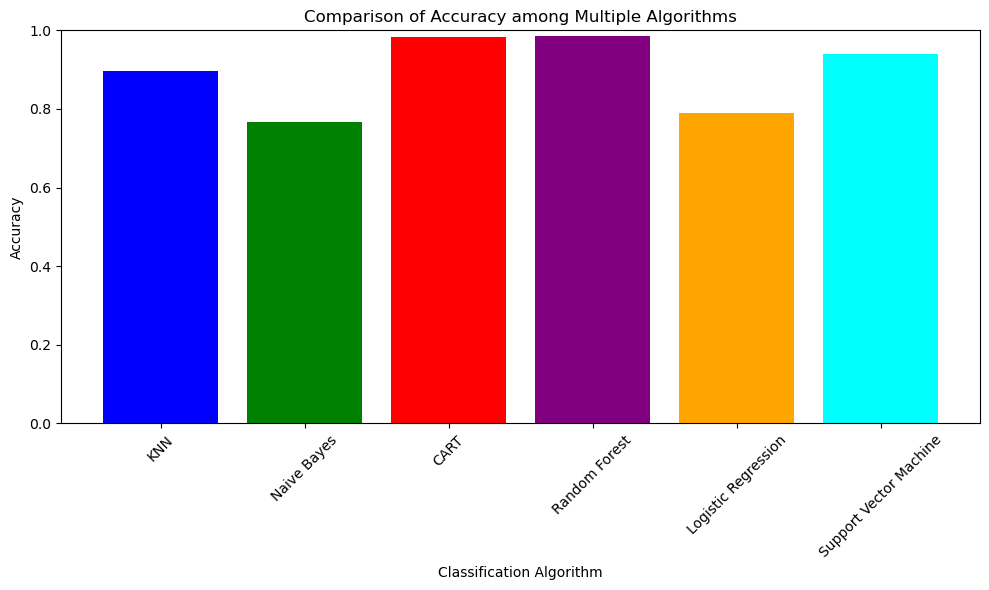

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])

# Adding labels and title
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy among Multiple Algorithms')

# Displaying the plot
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()